In [1]:
import os
import pandas as pd

import xml.etree.ElementTree as ET
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pydicom
import cv2 
from skimage import exposure, filters, morphology 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


ModuleNotFoundError: No module named 'pydicom'

In [ ]:
# Chemin de base vers tes fichiers CSV
base_path = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\classification'

# Charger les fichiers CSV
annotations_combine = pd.read_csv(os.path.join(base_path, 'annotations_combine.csv'))
classification_nodules = pd.read_csv(os.path.join(base_path, 'classification_nodules.csv'))
df_classification = pd.read_csv(os.path.join(base_path, 'df_classification.csv'))
df_filtered = pd.read_csv(os.path.join(base_path, 'df_filtred.csv'))

# Afficher les premières lignes pour vérification
print("Annotations Combine:")
print(annotations_combine.head())
print("\nClassification Nodules:")
print(classification_nodules.head())
print("\nDF Classification:")
print(df_classification.head())
print("\nDF Filtred:")
print(df_filtered.head())

In [ ]:
"""

# Chemin du dossier contenant les fichiers XML
chemin_dossier_xml = r'C:\Users\lenovo\pulmoscan\pulmo\PulmoScan\Data\tcia-lidc-xml\189'

# Nom du fichier CSV de sortie
fichier_csv = 'annotations5.csv'

# Namespace
namespace = {'ns': 'http://www.nih.gov'}

# Variable pour stocker les en-têtes
en_tetes = None

# Ouvrir le fichier CSV en mode écriture
with open(fichier_csv, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    
    # Parcourir chaque fichier dans le dossier
    for fichier in os.listdir(chemin_dossier_xml):
        if fichier.endswith('.xml'):
            chemin_fichier = os.path.join(chemin_dossier_xml, fichier)
            
            # Parser le fichier XML
            tree = ET.parse(chemin_fichier)
            root = tree.getroot()
            
            # Si les en-têtes n'ont pas encore été définis, les extraire du premier fichier XML
            if en_tetes is None:
                en_tetes = [
                    'annotationVersion', 'servicingRadiologistID',
                    'noduleID', 'imageZposition', 'imageSOP_UID', 'inclusion',
                    'subtlety', 'internalStructure', 'calcification', 'sphericity',
                    'margin', 'lobulation', 'spiculation', 'texture', 'malignancy',
                    'edgeMap_xCoord', 'edgeMap_yCoord'
                ]
                writer.writerow(en_tetes)
            
            # Extraire les données nécessaires
            for reading_session in root.findall('ns:readingSession', namespace):
                annotation_version = reading_session.find('ns:annotationVersion', namespace).text
                servicing_radiologist_id = reading_session.find('ns:servicingRadiologistID', namespace).text
                
                for nodule in reading_session.findall('ns:unblindedReadNodule', namespace):
                    nodule_id = nodule.find('ns:noduleID', namespace).text
                    
                    # Extraire les caractéristiques du nodule
                    characteristics = nodule.find('ns:characteristics', namespace)
                    if characteristics is not None:
                        subtlety = characteristics.find('ns:subtlety', namespace).text
                        internal_structure = characteristics.find('ns:internalStructure', namespace).text
                        calcification = characteristics.find('ns:calcification', namespace).text
                        sphericity = characteristics.find('ns:sphericity', namespace).text
                        margin = characteristics.find('ns:margin', namespace).text
                        lobulation = characteristics.find('ns:lobulation', namespace).text
                        spiculation = characteristics.find('ns:spiculation', namespace).text
                        texture = characteristics.find('ns:texture', namespace).text
                        malignancy = characteristics.find('ns:malignancy', namespace).text
                    else:
                        subtlety = internal_structure = calcification = sphericity = margin = lobulation = spiculation = texture = malignancy = ''
                    
                    # Extraire les informations du ROI
                    for roi in nodule.findall('ns:roi', namespace):
                        image_zposition = roi.find('ns:imageZposition', namespace).text
                        image_sop_uid = roi.find('ns:imageSOP_UID', namespace).text
                        inclusion = roi.find('ns:inclusion', namespace).text
                        
                        # Extraire les coordonnées edgeMap
                        for edge_map in roi.findall('ns:edgeMap', namespace):
                            x_coord = edge_map.find('ns:xCoord', namespace).text
                            y_coord = edge_map.find('ns:yCoord', namespace).text
                            
                            # Écrire une ligne dans le CSV
                            ligne = [
                                annotation_version, servicing_radiologist_id,
                                nodule_id, image_zposition, image_sop_uid, inclusion,
                                subtlety, internal_structure, calcification, sphericity,
                                margin, lobulation, spiculation, texture, malignancy,
                                x_coord, y_coord
                            ]
                            writer.writerow(ligne)

print(f"Les données ont été écrites dans {fichier_csv}")

"""

KeyboardInterrupt: 

In [ ]:
"""

# Liste des fichiers à combiner
fichiers = ['annotations.csv','annotations1.csv' ,'annotations2.csv', 'annotations3.csv', 'annotations4.csv', 'annotations5.csv']

# Lire et combiner les fichiers
dataframes = [pd.read_csv(fichier) for fichier in fichiers]
df_combine = pd.concat(dataframes, ignore_index=True)

# Sauvegarder le fichier combiné
df_combine.to_csv('annotations_combine.csv', index=False)

"""

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20256\263403447.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(fichier) for fichier in fichiers]


In [ ]:
## data = pd.read_csv('annotations_combine.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2644\3586960256.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('annotations_combine.csv')


In [ ]:
"""

def basic_statistics(data):
    print("Infos:\n", data.info())
    print("Description:\n", data.describe())
    print("Presence of null values:\n")
    print(data.isnull().sum())

"""

In [ ]:
"""

if __name__ == "__main__":
   
    basic_statistics(data)
    
    print("Data:\n", data.head())

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976828 entries, 0 to 976827
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   annotationVersion       972271 non-null  float64
 1   servicingRadiologistID  962061 non-null  object 
 2   noduleID                976828 non-null  object 
 3   imageZposition          976828 non-null  float64
 4   imageSOP_UID            976828 non-null  object 
 5   inclusion               976828 non-null  bool   
 6   subtlety                969841 non-null  float64
 7   internalStructure       969841 non-null  float64
 8   calcification           969841 non-null  float64
 9   sphericity              969841 non-null  float64
 10  margin                  969841 non-null  float64
 11  lobulation              969841 non-null  float64
 12  spiculation             969841 non-null  float64
 13  texture                 969841 non-null  float64
 14  malignancy          

In [ ]:
## data.head(5)

,annotationVersion,servicingRadiologistID,noduleID,imageZposition,imageSOP_UID,inclusion,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,edgeMap_xCoord,edgeMap_yCoord
0,3.12,anonymous,0,1604.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.192028152416...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,353
1,3.12,anonymous,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,172
2,3.12,anonymous,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,171
3,3.12,anonymous,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,170
4,3.12,anonymous,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,365,169


In [ ]:
"""

columns_to_drop = ["servicingRadiologistID", "annotationVersion"]
df_filtred = data.drop(columns=columns_to_drop, errors='ignore')  # Ignore si la colonne n'existe pas

# Sauvegarde du fichier nettoyé
cleaned_file_path = "df_filtred.csv"
df_filtred .to_csv(cleaned_file_path, index=False)

print(f"Fichier nettoyé enregistré sous : {cleaned_file_path}")

"""

Fichier nettoyé enregistré sous : df_filtred.csv


In [10]:
# Fonction pour visualiser la distribution des nodules concereuses et non concereuses
def plot_distribution(data, column):
    """Affiche un histogramme de la colonne spécifiée"""
    if column in data.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[column].dropna(), bins=30, kde=True)
        plt.xlabel(column)
        plt.ylabel("Nombre d'observations")
        plt.title(f"Distribution de {column}")
        plt.show()
    else:
        print(f"⚠️ La colonne '{column}' n'existe pas dans les données.")

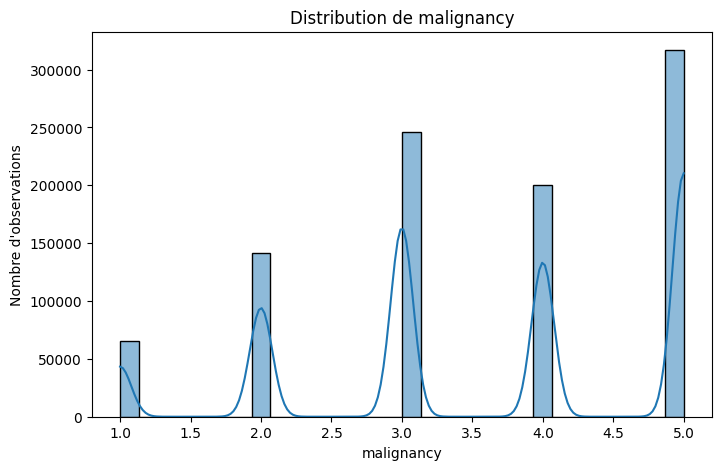

In [14]:
if __name__ == "__main__":
    plot_distribution(df_filtred, "malignancy")
    

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11288\1759152166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_classification["label"], palette=["green", "red"])


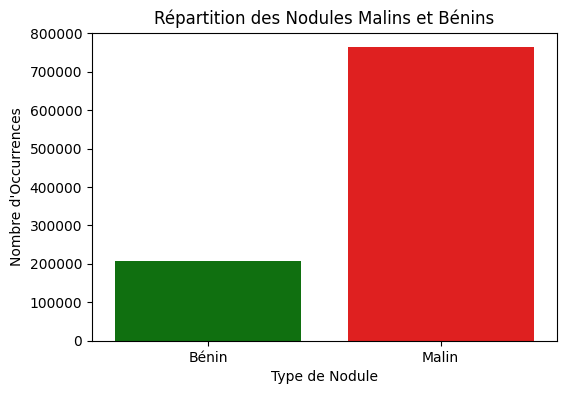

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11288\1759152166.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="sphericity", data=df_classification, palette=[ "red","green"])


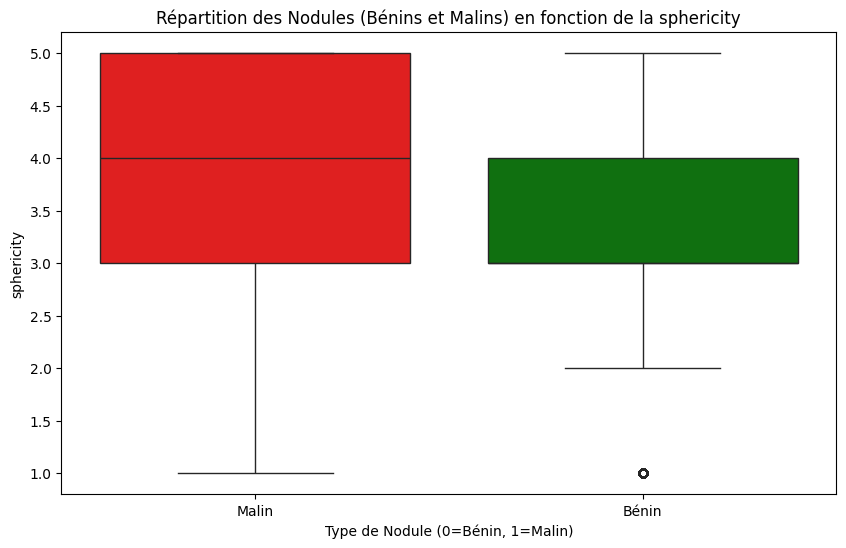

In [11]:
malignancy_col = "malignancy"


if malignancy_col in df_filtred.columns:
    
    
    
    # Création de la colonne 'label' avec gestion des NaN
    def classify_malignancy(value):
        if pd.isna(value):  # Si NaN, ne pas classifier
            return None
        return 0 if value in [1, 2] else 1  # 0 = Bénin, 1 = Malin

    df_filtred["label"] = df_filtred[malignancy_col].apply(classify_malignancy)

    # Exclure les valeurs None pour les visualisations
    df_classification = df_filtred.dropna(subset=["label"]).copy()
    df_classification["label"] = df_classification["label"].astype(int)  # Convertir en entier après suppression des NaN

    
    
    # 1️⃣ Histogramme de la répartition des nodules
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df_classification["label"], palette=["green", "red"])
    plt.xticks(ticks=[0, 1], labels=["Bénin", "Malin"])
    plt.xlabel("Type de Nodule")
    plt.ylabel("Nombre d'Occurrences")
    plt.title("Répartition des Nodules Malins et Bénins")
    plt.show()

    # Boxplot de la distribution des nodules bénins et malins en fonction de 'internal_structure'
    plt.figure(figsize=(10, 6))

    sns.boxplot(x="label", y="sphericity", data=df_classification, palette=[ "red","green"])

    plt.xlabel("Type de Nodule (0=Bénin, 1=Malin)")
    plt.ylabel("sphericity")
    plt.title("Répartition des Nodules (Bénins et Malins) en fonction de la sphericity")
    plt.xticks([0, 1], ["Malin","Bénin"])  # Pour remplacer les valeurs 0 et 1 par 'Bénin' et 'Malin'
    plt.show()
else:
    print("⚠️ La colonne 'malignancy' est absente du dataset.")

In [12]:
df_classification.head(5)

,noduleID,imageZposition,imageSOP_UID,inclusion,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,edgeMap_xCoord,edgeMap_yCoord,label
1,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,172,1
2,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,171,1
3,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,170,1
4,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,365,169,1
5,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,365,168,1


In [13]:
# Sauvegarde du fichier nettoyé
file_path = "df_classification.csv"
df_classification .to_csv(file_path, index=False)

print(f"Fichier  enregistré sous : {file_path}")

Fichier  enregistré sous : df_classification.csv


In [14]:
# 2. Séparer les malins (label 1) et bénins (label 0)
malins = df_classification[df_classification['label'] == 1]  # Garder TOUS les malins
benins = df_classification[df_classification['label'] == 0]  # Nous allons sous-échantillonner

# 3. Choisir la taille de l'échantillon bénin (ex: même nombre que les malins)
#n_echantillon_benin = len(malins)  # Option 1: même quantité
pourcentage = 0.3  # 30% des bénins
benins_echantillon = benins.sample(frac=pourcentage, random_state=42)

# 5. Combiner les données
df_final = pd.concat([malins, benins_echantillon])

# 6. Mélanger les lignes
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# 7. Sauvegarder le nouveau CSV
df_final.to_csv('classification_nodules.csv', index=False)

print(f"Dataset final créé avec:")
print(f"- {len(malins)} nodules malins (100%)")
print(f"- {len(benins_echantillon)} nodules bénins (échantillon)")
print(f"Total: {len(df_final)} lignes")

KeyboardInterrupt: 

**Data Processing**

In [ ]:
# Fonction pour normaliser l'image
def normalize_image(image):
    """Normalise l'image pour améliorer le contraste."""
    return exposure.rescale_intensity(image, in_range='image', out_range=(0, 255))


In [30]:
# Fonction pour extraire les poumons
def extract_lungs(image):
    """Extrait les poumons en utilisant un seuillage et des opérations morphologiques."""
    # Appliquer un seuillage pour isoler les poumons
    threshold = filters.threshold_otsu(image)
    binary_image = image > threshold

    # Supprimer les petits objets (artefacts)
    cleaned_image = morphology.remove_small_objects(binary_image, min_size=500)

    # Remplir les trous dans les poumons
    filled_image = morphology.binary_closing(cleaned_image, morphology.disk(5))

    # Appliquer le masque à l'image originale
    lungs_image = np.where(filled_image, image, 0)
    return lungs_image


In [31]:
def find_all_dicom_files(root_dir):
    """Trouve tous les fichiers DICOM dans l'arborescence"""
    dicom_files = []
    
    for root, dirs, files in tqdm(os.walk(root_dir), desc="Scanning DICOM files"):
        for file in files:
            if file.endswith('.dcm') or file.endswith('.DCM'):
                full_path = os.path.join(root, file)
                dicom_files.append(full_path)
    
    return dicom_files

In [32]:
def load_and_display_lungs(dicom_files):
    """Charge et affiche les images DICOM à partir d'une liste de chemins"""
    for dicom_path in tqdm(dicom_files, desc="Processing DICOM files"):
        try:
            # Charger le fichier DICOM
            dicom_image = pydicom.dcmread(dicom_path)
            image_data = dicom_image.pixel_array

            # Normaliser l'image
            normalized_image = normalize_image(image_data)

            # Extraire les poumons
            lungs_image = extract_lungs(normalized_image)

            # Afficher l'image originale et les poumons extraits
            plt.figure(figsize=(12, 6))

            # Image originale
            plt.subplot(1, 2, 1)
            plt.imshow(image_data, cmap=plt.cm.bone)
            plt.title(f"Image originale : {os.path.basename(dicom_path)}")
            plt.axis('off')

            # Poumons extraits
            plt.subplot(1, 2, 2)
            plt.imshow(lungs_image, cmap=plt.cm.bone)
            plt.title(f"Poumons extraits : {os.path.basename(dicom_path)}")
            plt.axis('off')

            plt.show()
            
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier {dicom_path}: {e}")
            continue


Scanning DICOM files: 16it [00:00, 1230.75it/s]


Nombre total de fichiers DICOM trouvés: 355


Processing DICOM files:   0%|          | 0/5 [00:00<?, ?it/s]

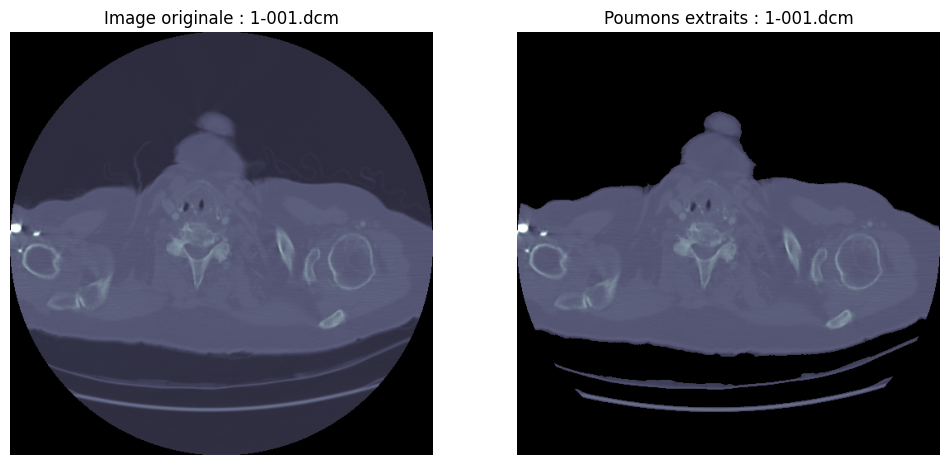

Processing DICOM files:  20%|██        | 1/5 [00:00<00:03,  1.03it/s]

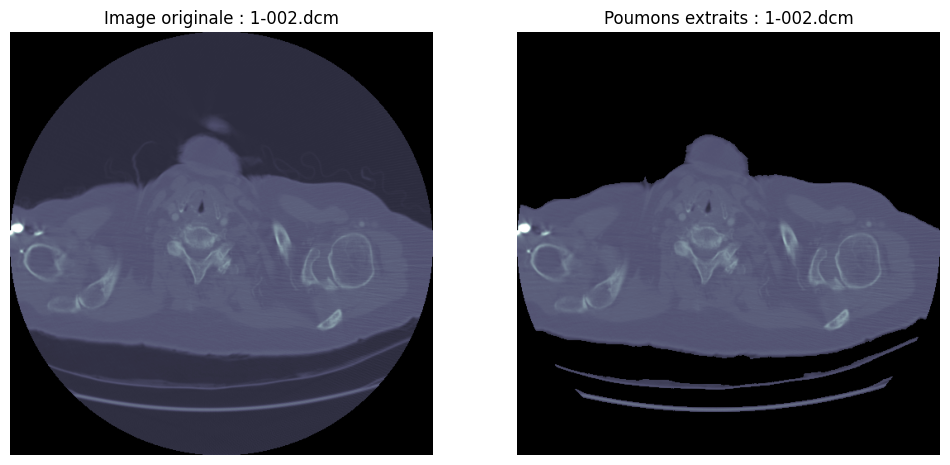

Processing DICOM files:  40%|████      | 2/5 [00:01<00:01,  1.62it/s]

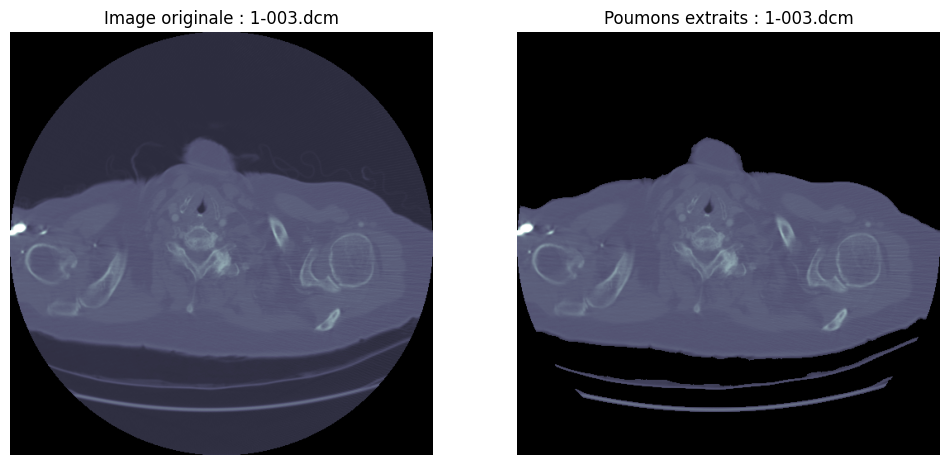

Processing DICOM files:  60%|██████    | 3/5 [00:01<00:01,  1.99it/s]

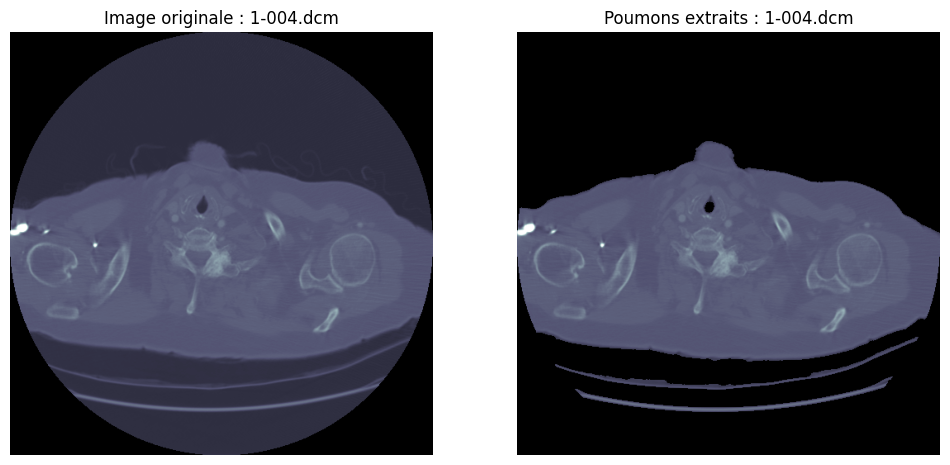

Processing DICOM files:  80%|████████  | 4/5 [00:02<00:00,  2.31it/s]

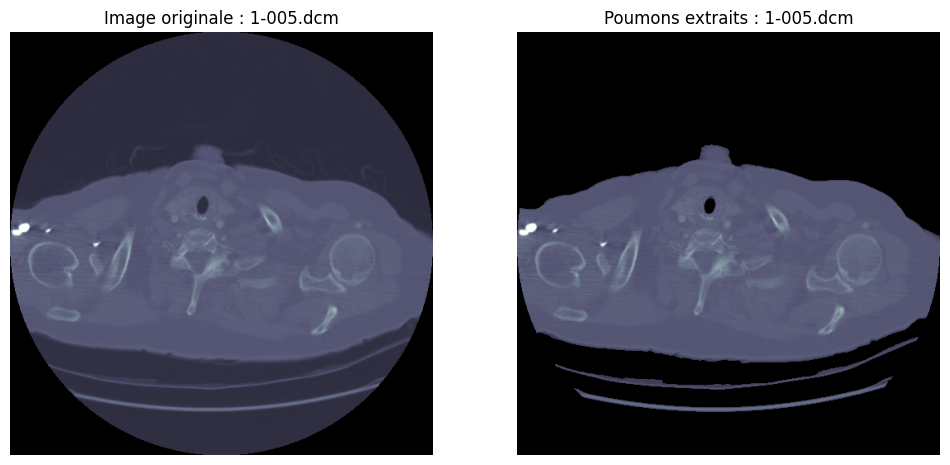

Processing DICOM files: 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


In [ ]:
# Utilisation
## dicom_root = r'C:\Users\lenovo\pulmoscan\pulmo\PulmoScan\Data\manifest-1600709154662\LIDC-IDRI'
## dicom_root = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\Data\manifest-1600709154662\LIDC-IDRI'
dicom_files = find_all_dicom_files(dicom_root)

print(f"Nombre total de fichiers DICOM trouvés: {len(dicom_files)}")

# Afficher seulement les 5 premiers fichiers pour le test
load_and_display_lungs(dicom_files[:5])

In [40]:
df_metadata.head(5)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,1,6,91 MB,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-26...,2025-03-11T15:14:06.315
1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,2,16,36 MB,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-35...,2025-03-11T15:14:49.71
1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,133,70,33 MB,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-30...,2025-03-11T15:17:08.972


**Data augmentation**

In [5]:
df = pd.read_csv('classification_nodules.csv')

In [27]:
# 3. Préparation des générateurs d'images
def create_image_generators(df, image_dir, target_size=(256, 256), batch_size=32):
    """
    Crée des générateurs d'images pour l'entraînement et la validation.
    
    Args:
        df: DataFrame contenant les chemins d'images et les labels
        image_dir: Répertoire contenant les images
        target_size: Taille cible des images
        batch_size: Taille du lot
        
    Returns:
        Tuple de générateurs (train, validation)
    """
    if not os.path.exists(image_dir):
        raise ValueError(f"Le dossier {image_dir} n'existe pas")
    
    # Conversion des labels en chaînes descriptives
    df['label'] = df['label'].map({0: 'benin', 1: 'malin'})
    
    # Configuration du générateur
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True
    )
    
    # Création des générateurs
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory=image_dir,
        x_col='imageSOP_UID',
        y_col='label',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training',
        class_names=['benin', 'malin'],
        validate_filenames=True
    )
    
    val_generator = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory=image_dir,
        x_col='imageSOP_UID',
        y_col='label',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation',
        class_names=['benin', 'malin'],
        validate_filenames=True
    )
    
    print("Générateurs créés avec succès!")
    print(f"Exemples d'entraînement: {train_generator.samples}")
    print(f"Exemples de validation: {val_generator.samples}")
    
    return train_generator, val_generator

In [28]:
# Exécution principale
if __name__ == "__main__":
    # 1. Chargement et préparation des données
    df = pd.read_csv('classification_nodules.csv')  # Remplacez par votre chemin
    df_prepared = df
    df_prepared.to_csv('classification_nodules.csv', index=False)
    
    
   # Chemin du dossier contenant les images DICOM
    dicom_folder = r'C:\Users\lenovo\pulmoscan\pulmo\PulmoScan\Data\manifest-1600709154662\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-35511\3000923.000000-NA-62357'
    
    
    # 3. Préparation des générateurs d'images
    try:
        train_gen, val_gen = create_image_generators(df_prepared, dicom_folder)
    except Exception as e:
        print(f"Erreur: {str(e)}")

Found 0 validated image filenames belonging to 0 classes.


c:\Users\lenovo\pulmoscan\pulmo\PulmoScan\venv\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 787500 invalid image filename(s) in x_col="imageSOP_UID". These filename(s) will be ignored.
  warnings.warn(


Found 0 validated image filenames belonging to 0 classes.
Générateurs créés avec succès!
Exemples d'entraînement: 0
Exemples de validation: 0


c:\Users\lenovo\pulmoscan\pulmo\PulmoScan\venv\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 787500 invalid image filename(s) in x_col="imageSOP_UID". These filename(s) will be ignored.
  warnings.warn(
